In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
data = pd.read_csv('./data/laptopData.csv')

# Rename the column 'Unnamed: 0' to 'ID'
data.rename(columns={'Unnamed: 0': 'ID'}, inplace=True)

# Define the adjusted exchange rate based on a specific example
price_in_pkr_example = 47895.5232  # Example price in PKR
target_price_usd = 1000  # Desired average price in USD
adjusted_exchange_rate = price_in_pkr_example / target_price_usd

# Remove rows with NaN values in the 'Price' column
data = data[~data['Price'].isna()]


# Convert the 'Price' column to USD and replace the original column
data['Price'] = data['Price'] / adjusted_exchange_rate

# Create a copy of the original DataFrame
copy_data = data.copy()

# Display rows number
print("Number of rows in the original DataFrame:", data.shape[0])

#display data types of each column
print("Data types:" )
print(data.dtypes)

# Display the first few rows of the modified DataFrame
data.head()

Number of rows in the original DataFrame: 1273
Data types:
ID                  float64
Company              object
TypeName             object
Inches               object
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price               float64
dtype: object


,ID,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1490.299686
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,1000.000000
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,639.642245
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2822.713418
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,2006.363050


# Visualization 1: Distribution of Price
### Why is this Feature Significant?
The Price feature is significant because it is the target variable in the regression problem, and understanding its distribution helps identify outliers, assess skewness, and evaluate the spread, all of which are crucial for proper model preprocessing and improving prediction accuracy.

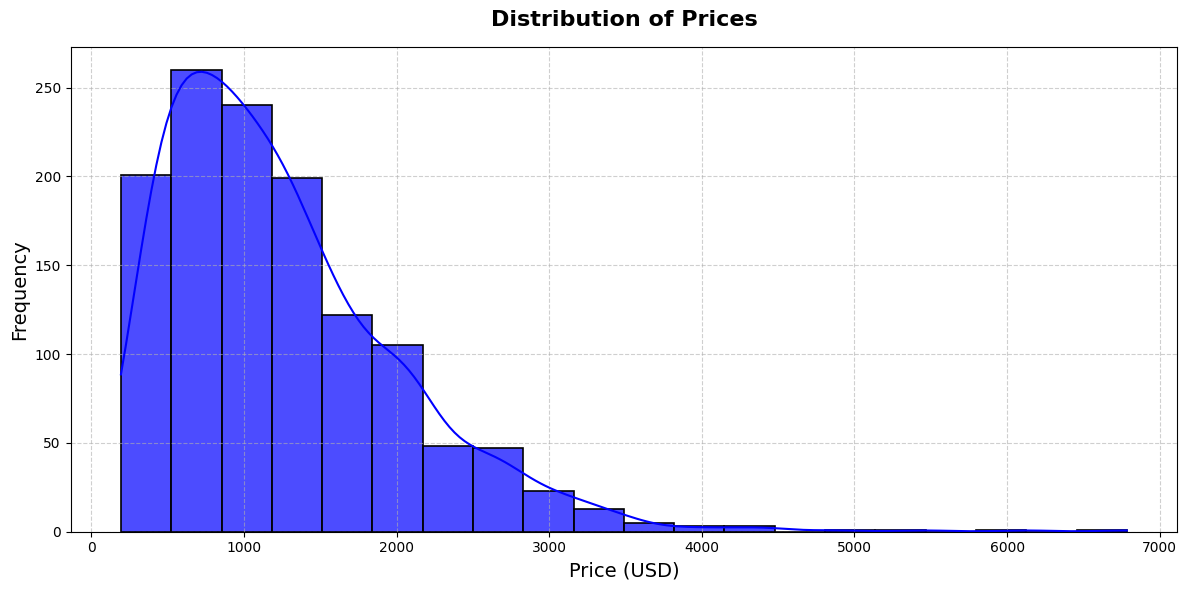

In [2]:
# Plot the distribution of prices
plt.figure(figsize=(12, 6))
sns.histplot(
    copy_data['Price'], 
    kde=True, 
    bins=20, 
    color='blue', 
    alpha=0.7, 
    edgecolor='black',  # Clear edges for the bars
    linewidth=1.2       # Thickness of the bar edges
)

# Adding title and axis labels
plt.title("Distribution of Prices", fontsize=16, fontweight='bold', pad=15)
plt.xlabel("Price (USD)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Adding a grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Ensuring the layout is adjusted properly
plt.tight_layout()

# Show the plot
plt.show()


## Why is it Chosen as a Key Visualization?
The Price Distribution is displayed using a histogram with a KDE curve because this combination provides a clear, intuitive view of the price data's distribution. The histogram helps visualize the frequency of different price ranges, while the KDE smooths out the histogram, providing insight into the underlying distribution shape. 

# Visualization 2: Price vs TypeName
### Why is this Feature Significant?
The TypeName represents the category or purpose of the laptop, which can greatly affect the price. Different categories target specific use cases, such as gaming, mobility, or basic use, and usually have distinct price ranges. For example, gaming laptops tend to be more expensive due to their high-performance hardware, while laptops or netbooks are often cheaper and designed for general use.

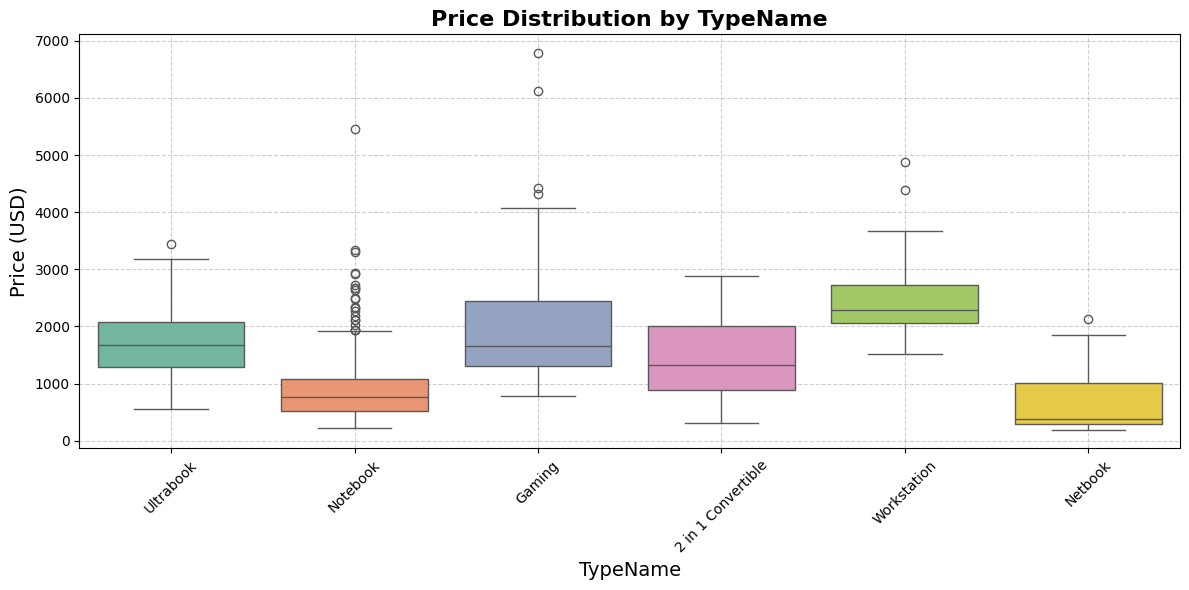

In [3]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=copy_data, x='TypeName', y='Price', palette='Set2')
plt.title("Price Distribution by TypeName", fontsize=16, fontweight='bold')
plt.xlabel("TypeName", fontsize=14)
plt.ylabel("Price (USD)", fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## Why is it Chosen as a Key Visualization?
The boxplot is an excellent choice because it clearly visualizes the distribution of prices within each TypeName category, including the median price, the interquartile range (IQR), and any outliers. This helps us understand the variability in prices for each laptop type (e.g., Gaming, Ultrabook, Notebook) and compare their typical price ranges effectively.

# Visualization 3: Price vs Company
### Why is this Feature Significant?
The company of a laptop greatly influences its price due to brand reputation, target market, and perceived quality. Premium brands like Apple and Dell are known for higher-priced products for professional or advanced users. In contrast, brands like Acer and Asus often offer more affordable options, making this feature a potentially key indicator for price differentiation.

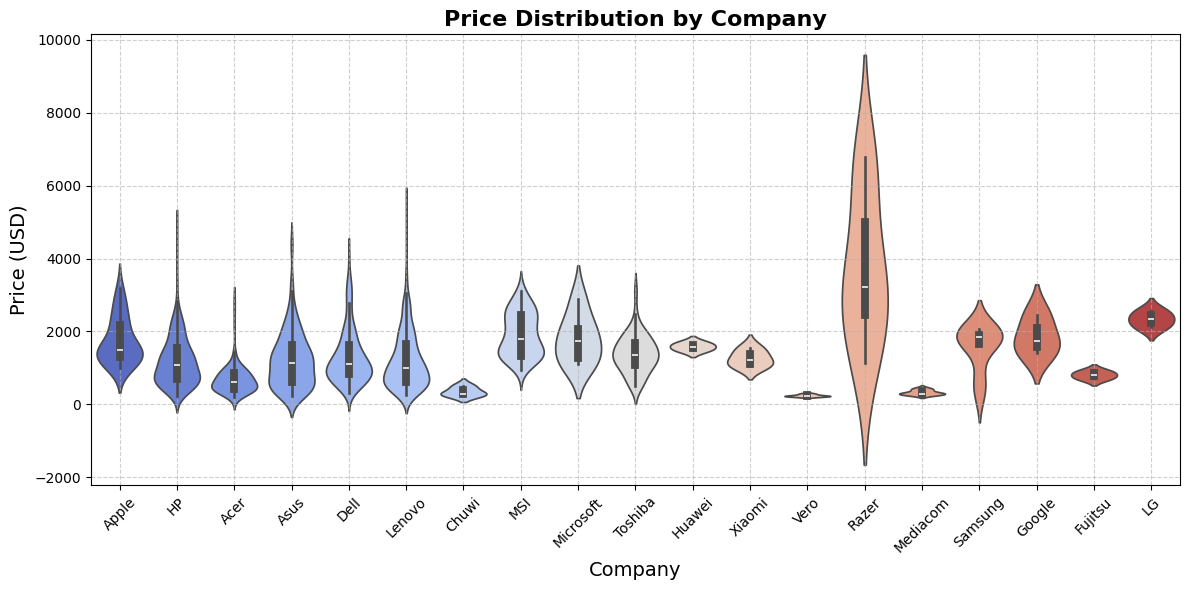

In [4]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=copy_data, x='Company', y='Price', palette='coolwarm', scale='width')
plt.title("Price Distribution by Company", fontsize=16, fontweight='bold')
plt.xlabel("Company", fontsize=14)
plt.ylabel("Price (USD)", fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## Why is it Chosen as a Key Visualization?
The violin plot is a great choice for this comparison because it provides both the distribution shape and detailed insights into variability within each company. The violin plot adds density information, revealing patterns like bimodal distributions or skewness. This makes it especially useful for understanding whether a company's pricing is concentrated (e.g., Apple with premium pricing) or spread across multiple tiers (e.g., Razer). It combines clarity with richness, making it an ideal representation for price comparisons by company.

## Visualization 4: Features Correlation Heatmap
### Why is this Feature Significant?
The correlation heatmap is significant because it reveals relationships between numerical features in the dataset. By highlighting how strongly features like RAM, Weight, and Inches are correlated with Price, it helps identify which attributes influence the cost the most. Additionally, it provides insights into interdependencies between features, such as whether RAM and Storage are positively correlated, aiding in feature selection and model building.

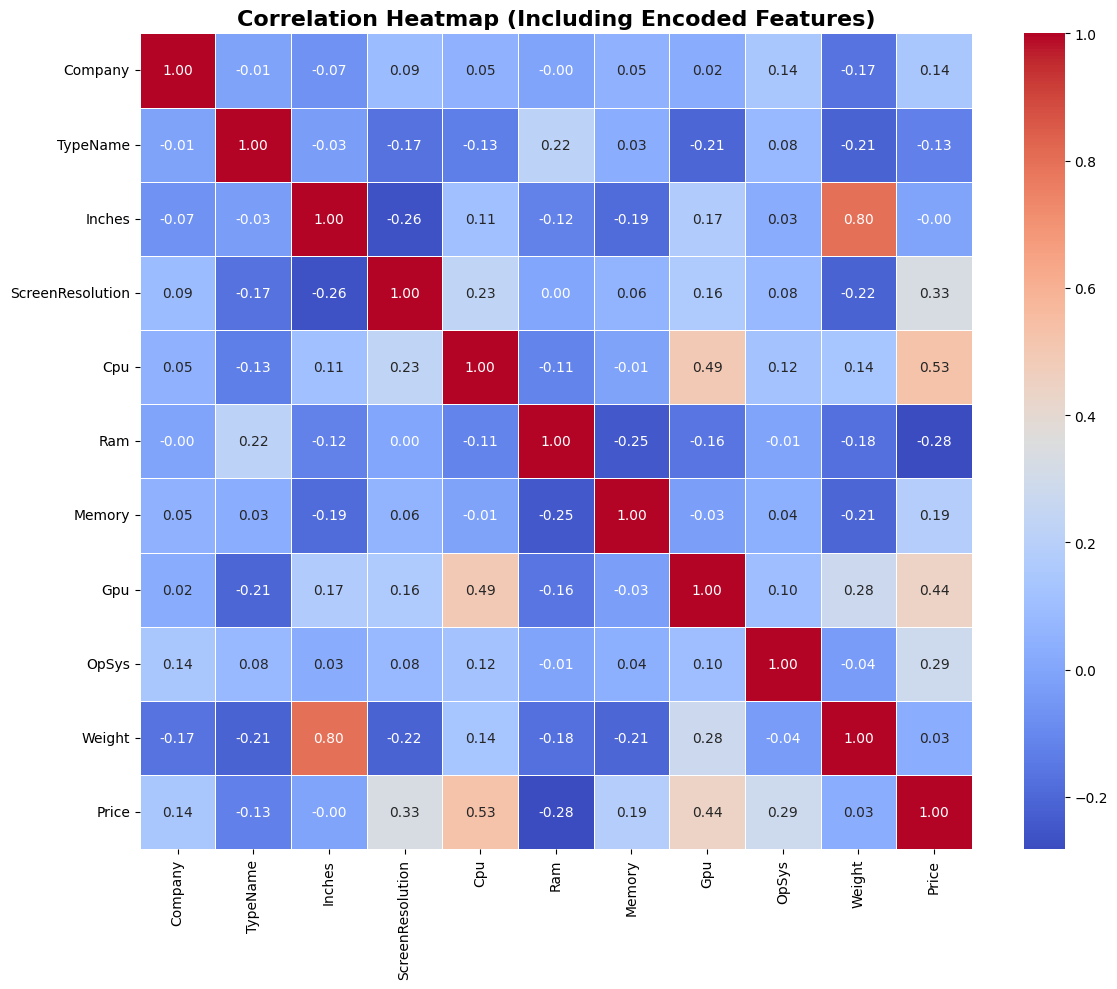

In [5]:
# Convert categorical features to numeric using Label Encoding
from sklearn.preprocessing import LabelEncoder

categorical_features = ['Company', 'TypeName', 'OpSys' , 'Gpu', 'Memory', 'Ram', 'Cpu', 'ScreenResolution', 'Inches', 'Weight']
encoder = LabelEncoder()
encoded_data = copy_data.copy()

for feature in categorical_features:
    encoded_data[feature] = encoder.fit_transform(encoded_data[feature])

# Remove the 'ID' column
encoded_data = encoded_data.drop(columns=['ID'])

# Select all numeric features (after encoding)
numeric_features = encoded_data.select_dtypes(include=[np.number])

# Calculate correlation matrix
correlation_matrix = numeric_features.corr()

# Plot the Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (Including Encoded Features)", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()



## Why is it Chosen as a Key Visualization?
The heatmap is the best representation for examining feature relationships because it provides a visual summary of pairwise correlations in a compact and interpretable format. The use of color gradients allows for quick identification of strong positive or negative relationships, while numerical annotations provide precise values. This format is particularly effective for datasets with multiple features, as it enables you to assess all correlations simultaneously, rather than analyzing each pair individually, saving time and reducing complexity.

# Visualization 5: Price vs Cpu
### Why is this Feature Significant?
The relationship between Price and CPU is significant because the CPU is a primary determinant of performance, efficiency, and computational capability, which directly influences the cost of a laptop. Higher-performance CPUs, typically associated with higher clock speeds, more cores, and newer architectures, often cater to premium devices designed for intensive tasks like gaming, video editing, and professional workloads. This makes the CPU a key feature for distinguishing laptops across price segments. 


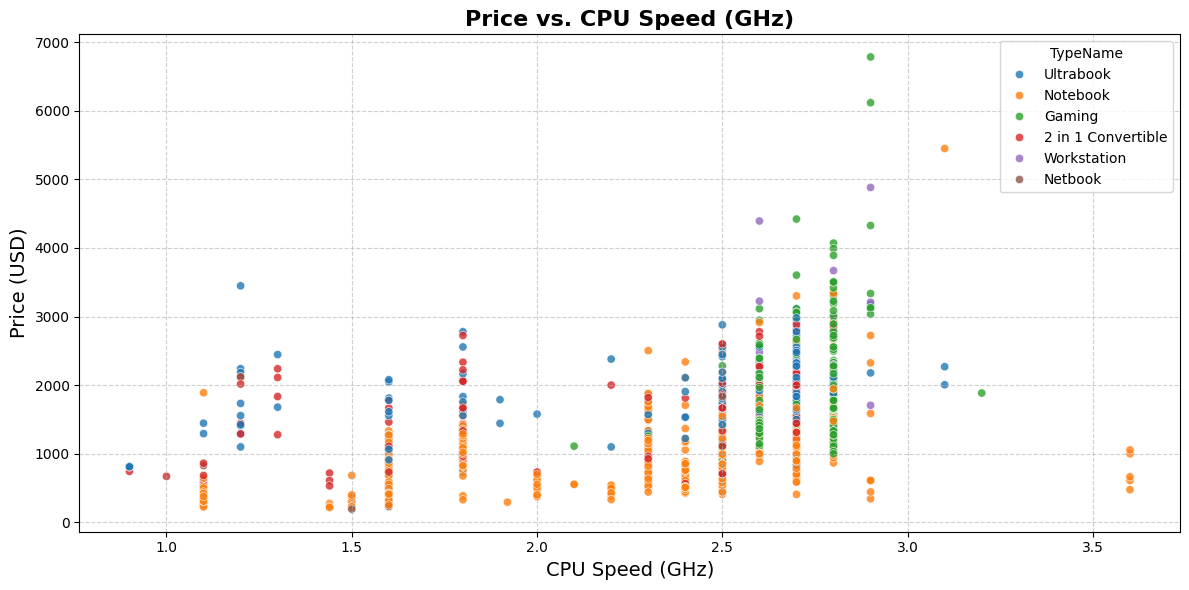

In [6]:
# Extract GHz from CPU column
copy_data['Cpu_Speed'] = copy_data['Cpu'].str.extract(r'(\d+\.\d+)GHz').astype(float)

# Scatterplot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=copy_data, x='Cpu_Speed', y='Price', hue='TypeName', palette='tab10', alpha=0.8)
plt.title("Price vs. CPU Speed (GHz)", fontsize=16, fontweight='bold')
plt.xlabel("CPU Speed (GHz)", fontsize=14)
plt.ylabel("Price (USD)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Remove the 'Cpu_Speed' column
copy_data = copy_data.drop(columns=['Cpu_Speed']) 

## Why is it Chosen as a Key Visualization?
The scatterplot is chosen because it visually captures the direct relationship between CPU Speed and Price for individual laptops in a detailed and intuitive manner. By plotting each laptop as a point, it allows for easy identification of trends, outliers, and variability across different ranges. Unlike aggregated visualizations, it preserves the granularity of the data, showing the exact distribution of individual points rather than summarized averages.

# preproccing

In [7]:
# Convert categorical features to numeric using Label Encoding
categorical_features = ['Company', 'TypeName', 'OpSys' , 'Gpu', 'Memory', 'Ram', 'Cpu', 'ScreenResolution', 'Inches', 'Weight']
encoder = LabelEncoder()
model_data = copy_data.copy()

for feature in categorical_features:
    model_data[feature] = encoder.fit_transform(model_data[feature])

# Remove the 'ID' column
model_data = model_data.drop(columns=['ID'])

# Select all numeric features (after encoding)
numeric_features = model_data.select_dtypes(include=[np.number])
print("Encoded columns done.")

Encoded columns done.


# Basic Model Pipeline 

In [8]:
from sklearn.model_selection import train_test_split
import xgboost as xgb

# Feature selection and target variable
X = model_data.drop(columns=['Price'])
y = model_data['Price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
model = xgb.XGBRegressor(random_state=42)
model.fit(X_train, y_train)
    
# Make predictions
y_pred = model.predict(X_test)

print("Model training complete.")

Model training complete.


# Results of the basic pipeline

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
    
print(f"Model Performance Metrics:")
print(f"RMSE: {rmse:.2f}k")
print(f"MAE: {mae:.2f}k")
print(f"R2 Score: {r2:.3f}")



Model Performance Metrics:
RMSE: 313.30k
MAE: 193.69k
R2 Score: 0.845


# Error Analysis
After running the basic model, we will analyze its errors to identify areas for improvement.

### A. Predicted vs Actual Price
The "Predicted vs Actual Price" plot is important for error analysis as it visually shows how closely the model’s predictions align with actual values. It helps identify systematic errors and assess model accuracy by how close the points are to the red dashed line. This enables the identification of areas where the model performs poorly and highlights specific weaknesses for improvement.

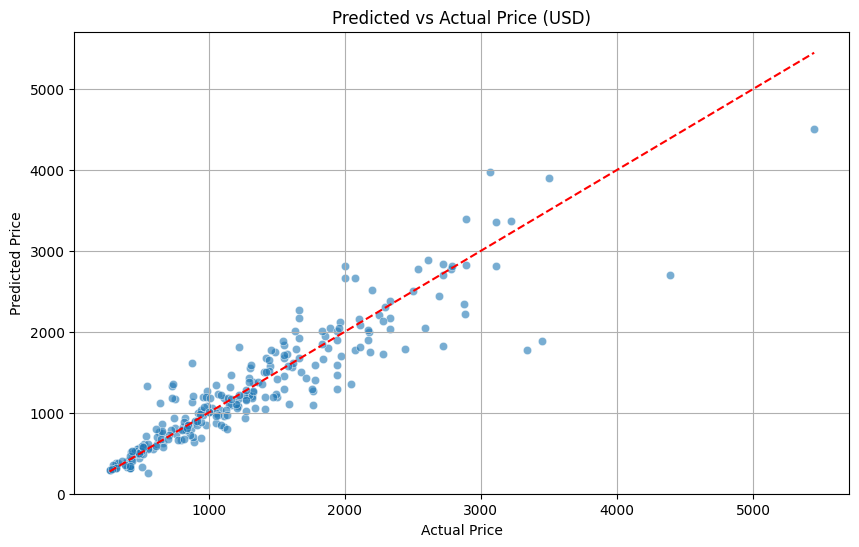

In [10]:
# Plot Predicted vs Actual
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
sns.lineplot(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Predicted vs Actual Price (USD)")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.grid(True)
plt.show()

#### Insights
- **Strong Correlation**:
    The points closely follow the red diagonal line, indicating that the model's predictions are strongly correlated with the actual prices. This suggests the model is performing well.
- **Outliers**:
    A few points significantly deviate from the red line. These represent outliers where the model struggles to predict accurately, potentially due to unusual or extreme values in the data.
- **Key Actionable Insights**:
    - The model is reliable for the majority of the dataset but struggles with extreme cases (outliers). Investigating these outliers could provide insights into model improvement, such as refining feature engineering or handling rare cases differently.
    - The consistent clustering around the diagonal shows that the feature selection and preprocessing were effective in creating an accurate model.


### B. Error Distribution
The "Error Distribution" plot is crucial in error analysis as it highlights the spread, bias, and symmetry of residuals, helping identify systematic errors and outliers, and evaluate if the residuals follow a normal distribution—essential for assessing the model's assumptions and areas needing improvement.

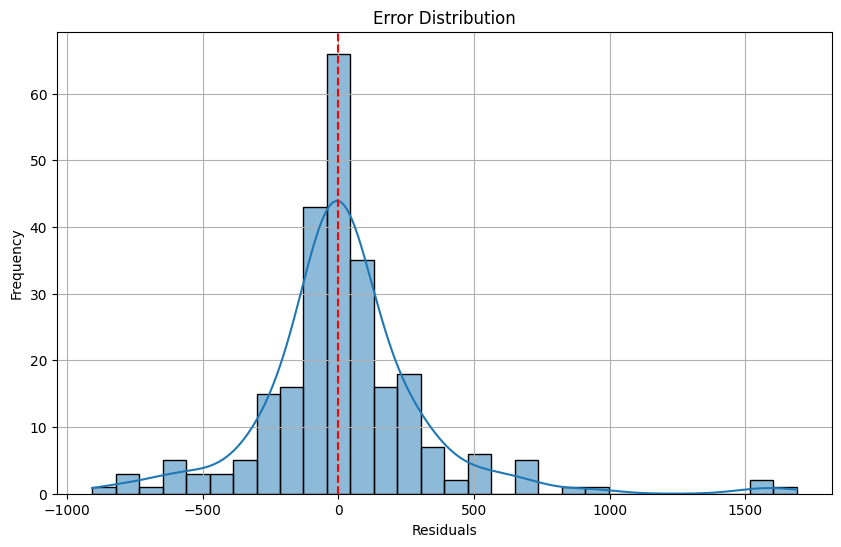

In [11]:
# Calculate residuals
residuals = y_test - y_pred


# Plot Error Distribution
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.axvline(x=0, color='red', linestyle='--', label='Zero Residual (Perfect Prediction)')
plt.title("Error Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


#### Insights
- **Concentration of Residuals**:
    The majority of residuals are tightly clustered around zero, reinforcing the model's general accuracy across most predictions. This suggests a strong alignment between actual and predicted prices for the bulk of the data.

- **Distribution Patterns**:
    The presence of a relatively smooth curve suggests that the errors follow an approximately normal distribution. This supports the assumption that the model handles errors systematically rather than erratically, which is favorable for further tuning and improvement.

- **Actionable Insight**:
    The slight skewness and presence of outliers on the positive side suggest a need to explore higher-priced laptops in more detail. For instance, feature engineering (like better handling of brand-specific effects or rare configurations) may reduce these overestimations.


### C. Features Importance
This plot is essential for error analysis as it identifies which features significantly impact the model's predictions. This enables targeted investigation into whether high-importance features are contributing to errors or if low-importance features are adding noise, thereby guiding improvements in feature selection and model development.

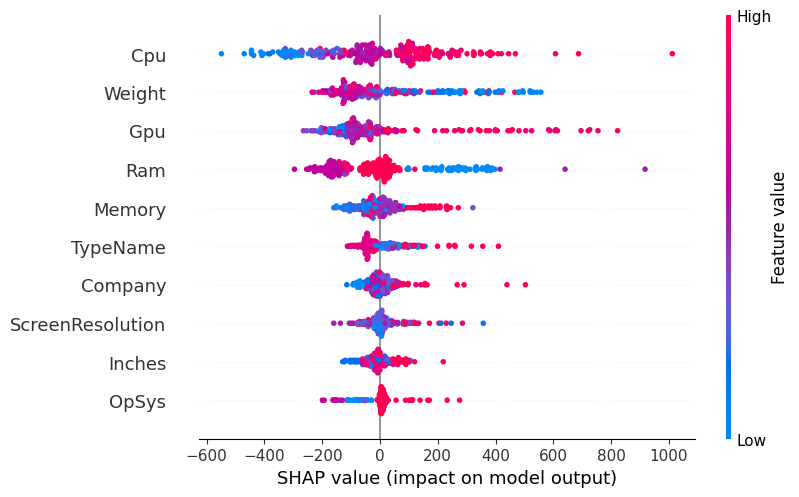

In [12]:
import shap

# Calculate SHAP values
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Plot SHAP beeswarm plot
shap.plots.beeswarm(shap_values)

#### Insights
- **Feature Importance and Contribution**:
   - **Cpu, Weight, and Gpu** have significant SHAP values, indicating they are critical for predicting price.
   - Features like **OpSys** and **Inches** have relatively small SHAP values, meaning they have a limited impact on price prediction.

- **Most Influential Feature**:
    Among all features, **Cpu** stands out as the most consistently impactful on price prediction. Higher CPU performance (e.g., speed, generation) strongly correlates with higher prices, reflecting the importance of computational power in determining the value of laptops.

- **Outliers and Variability**:
   - Some features, such as **Gpu** and **Weight**, have wide spreads of SHAP values, indicating variability in their influence across the dataset.
   - The presence of outliers (dots far from the cluster) suggests specific cases where a feature has an unusually high or low impact.

- **Actionable Insight**:
   - Features with high SHAP value variability, like **Gpu** and **Weight**, might require further feature engineering or detailed analysis to capture their nuanced effects better.
   - **OpSys** and **Inches** may have less relevance for price prediction and could potentially be deprioritized or re-examined.

### D. Overestimations and Underestimations by Price


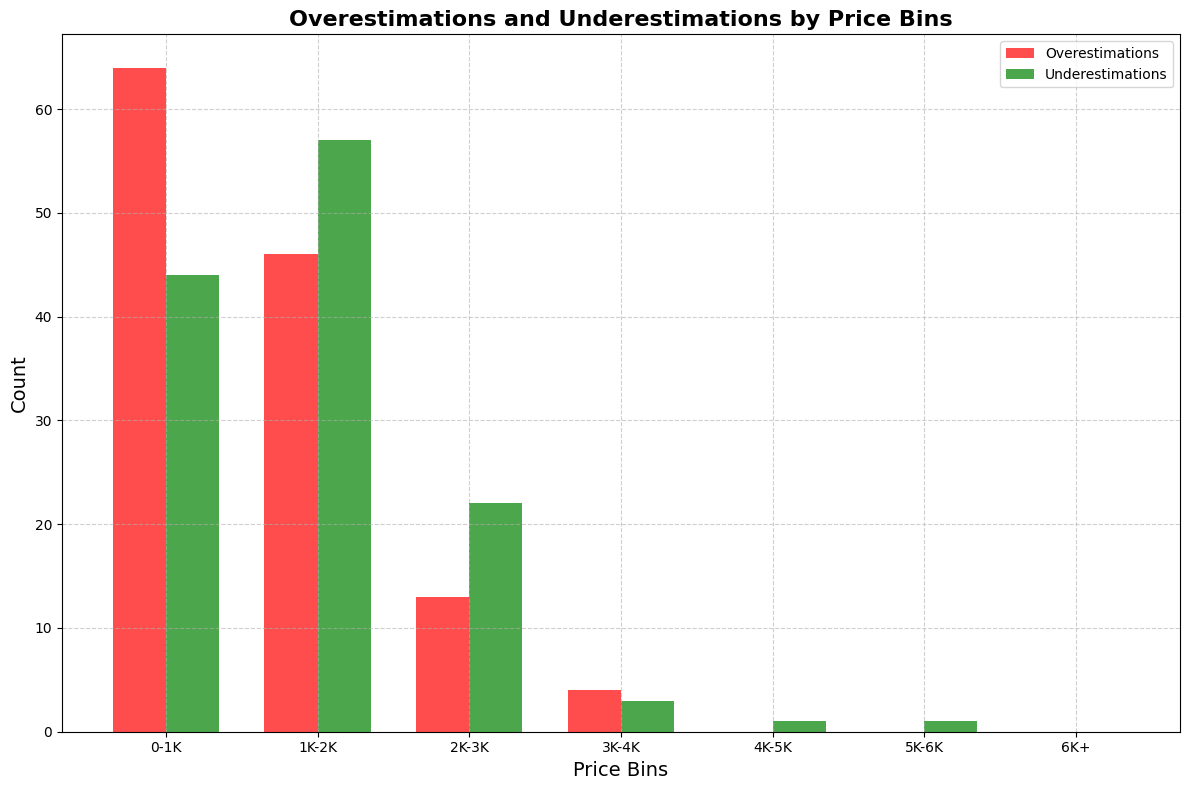

In [13]:

# Define bins for price ranges
price_bins = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000]
price_labels = ['0-1K', '1K-2K', '2K-3K', '3K-4K', '4K-5K', '5K-6K', '6K+']
y_test_binned = pd.cut(y_test, bins=price_bins, labels=price_labels)

# Create a DataFrame for analysis
analysis_df = pd.DataFrame({
    'Actual Price': y_test,
    'Predicted Price': y_pred,
    'Residual': residuals,
    'Price Range': y_test_binned
})

# Calculate overestimations and underestimations by price range
over_under_estimations = analysis_df.groupby('Price Range').apply(
    lambda group: pd.Series({
        'Overestimations': (group['Residual'] < 0).sum(),
        'Underestimations': (group['Residual'] > 0).sum()
    })
).reset_index()

# Plot overestimations and underestimations by price range
plt.figure(figsize=(12, 8))
bar_width = 0.35
index = np.arange(len(over_under_estimations))

plt.bar(index, over_under_estimations['Overestimations'], bar_width, label='Overestimations', color='red', alpha=0.7)
plt.bar(index + bar_width, over_under_estimations['Underestimations'], bar_width, label='Underestimations', color='green', alpha=0.7)

plt.ylabel('Count', fontsize=14)
plt.xlabel('Price Bins', fontsize=14)
plt.title('Overestimations and Underestimations by Price Bins', fontsize=16, fontweight='bold')
plt.xticks(index + bar_width / 2, over_under_estimations['Price Range'])
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### Insights
- **Higher Errors in Lower Price Ranges**:
    The **0-1K** and **1K-2K** price bins exhibit a higher number of both overestimations (red bars) and underestimations (green bars). This indicates that the model struggles to predict accurately in the lower price range, possibly due to higher variability or the influence of features not fully captured by the model.

- **Imbalance Between Overestimations and Underestimations**:
   - In the **0-1K** range, overestimations (red) are more frequent than underestimations (green), indicating a bias where the model predicts higher prices than the actual ones for lower-cost laptops.
   - Conversely, in the **2K-3K** range, underestimations are more frequent, implying that the model undervalues some laptops in this range.

- **Actionable Insights**:
   - Focus on improving model performance for the **0-2K** range by examining feature contributions and ensuring that key predictors (e.g., RAM, CPU) are appropriately weighted for these lower-priced laptops.
   - Investigate cases of frequent underestimations in the **2K-3K** range to refine the model for this category.
   - Collect more data or adjust the model for high-priced laptops (**4K+**) to increase reliability in this segment.